###### Content is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>, code under <a rel="license" href="http://opensource.org/licenses/MIT">MIT license</a> $(c)$2015 Jiasheng Yu.

# Sine-Gordon Equation in 1D

This notebook solves the Sine-Gordon Equation in 1D system with different initial conditions. The code uses a "central-difference in both time and space" scheme.

## What is Sine-Gordon Equation?

We are familiar with the Wave Equation, which is a hyperbolic form of second-order PDE:
<br\><br\>
$$\frac{\partial^2 u}{\partial t^2}-c^2\frac{\partial^2 u}{\partial x^2}=0$$
<br\>If we do some small changing to this linear equation, or make it nonlinear, what will happen? Let $c=1$, and add a nonlinear term to the equation, then the 1-D Sine-Gordon Equation can be given:<br\>
$$\frac{\partial^2 u}{\partial t^2}-\frac{\partial^2 u}{\partial x^2}+\sin u=0$$<br\>
The 2-D and 3-D form of the Sine-Gordon Equation can be given by
<br\><br\>
$$\frac{\partial^2 u}{\partial t^2}-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}+\sin u=0$$<br\>
and $$\frac{\partial^2 u}{\partial t^2}-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}-\frac{\partial^2 u}{\partial z^2}+\sin u=0$$<br\>

Because the Sine-Gordon Equation is a nonlinear extention of the standard linear wave equation, it is one kind of equations describing nonlinear wave motion, and its velocity will not depend on the wave amplitude.

Here is a YouTube video introducing the Sine-Gordon Equation and the soliton:

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('re6NMq09Js0')

### How is the equation applied?

The Sine-Gordon Equation arose in the study of differential geometry. In recent years, it is applied in quite many physical problems, such as dislocations in crystals (Frenkel and Kontorova1939), the propagation of fluxons in Josephson junctions (Josephson 1965; Scott 1969), stability of fluid motions (Scott et al. 1973; Gibbon 1985), etc.

## What does its solution look like

Almost all solutions of this equation are **soliton** solutions. Solitions are self-reinforcing solitary waves, which will maintain their shapes and move at a constant speed. In this project, 2 of the most famous soliton solutions are introduced. Now, let's see it.

In [2]:
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16
from numpy import sin,cos,exp,arctan,sqrt,cosh
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [3]:
#Setup the model for the equation
l=20.
nx=201
x=numpy.linspace(-l,l,nx)
dx=2*l/(nx-1)
T=30
dt=0.05
nt=int(T/dt)

### 1. Kink (anti-kink) solution

Many published works give different forms of analytical solutions for the Sine-Gordon Equation. 
One basic analytical solution of the Sine-Gordon Equation is
<br\><br\>
$$u(x,t)=4\arctan\left[\exp \left ( \pm \frac{x-vt}{\sqrt{1-v^2}} \right )\right]$$
<br\>which discribes a moving soliton with a propagation velocity $v$ and changes the phase from $0$ to $2\pi$ (kink, with "+" sign) or from $2\pi$ to $0$ (anti-kink, with "-" sign). 

In [4]:
v=0.5
u_kink_ana=numpy.zeros((nt,nx))
for t in range(nt):
    u_kink_ana[t,:]=4.*arctan(exp((x-v*t)/sqrt(1.-v**2)))

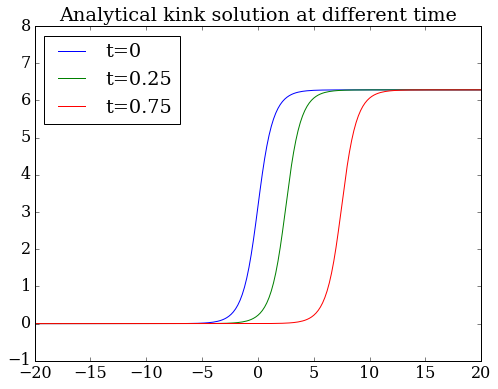

In [5]:
plt.figure(figsize=(8,6))
plt.plot(x,u_kink_ana[0,:], label='t=0')
plt.plot(x,u_kink_ana[5,:], label='t=0.25')
plt.plot(x,u_kink_ana[15,:], label='t=0.75')
plt.ylim(-1,8)
plt.title('Analytical kink solution at different time')
plt.legend(loc='best')

In [6]:
u_anti_ana=numpy.zeros((nt,nx))
for t in range(nt):
    u_anti_ana[t,:]=4.*arctan(-exp((x-v*t)/sqrt(1.-v**2)))

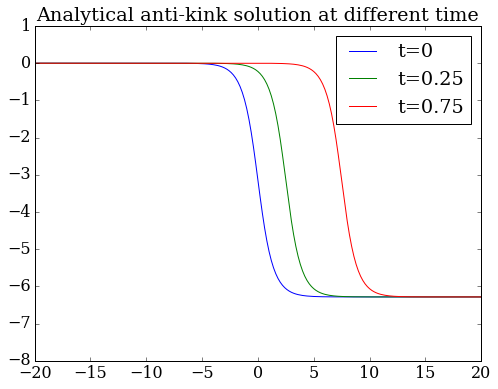

In [7]:
plt.figure(figsize=(8,6))
plt.plot(x,u_anti_ana[0,:], label='t=0')
plt.plot(x,u_anti_ana[5,:], label='t=0.25')
plt.plot(x,u_anti_ana[15,:], label='t=0.75')
plt.ylim(-8,1)
plt.title('Analytical anti-kink solution at different time')
plt.legend(loc='best')

### 2. Breather solution

Another common solution of the Sine-Gordon Equation is given by <br\><br\>
$$u=4 \arctan \left[\frac{\sqrt{1-\omega^2}\sin(\omega t)}{\omega \cosh(\sqrt{1-\omega^2}x)}\right]$$
<br\>
which is the breather soliton solution. $\omega$ is called the frequency of the wave.

In [8]:
omega=0.5
u_breather_ana=numpy.zeros((nt,nx))
for t in range(nt):
    u_breather_ana[t,:]=-4.*arctan((sqrt(1-omega**2)*sin(omega*t))/(omega*cosh(sqrt(1-omega**2)*x)))

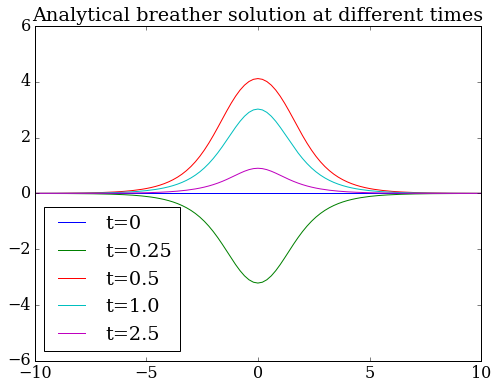

In [9]:
plt.figure(figsize=(8,6))
plt.plot(x,u_breather_ana[0,:], label='t=0')
plt.plot(x,u_breather_ana[5,:], label='t=0.25')
plt.plot(x,u_breather_ana[10,:], label='t=0.5')
plt.plot(x,u_breather_ana[20,:],label='t=1.0')
plt.plot(x,u_breather_ana[50,:],label='t=2.5')
plt.xlim(-10,10)
plt.ylim(-6,6)
plt.title('Analytical breather solution at different times')
plt.legend(loc='best')

## Use explicit scheme to solve the 1D Sine-Gordon Equation

In this notebook, the equation is solved by the central-difference scheme both in time and space. Now, we use the explicit scheme to find the numerical solution. As is known in what we learned from the previous notebooks, the second derivative terms in an equation are usually discreted by the central-difference scheme, which is also second-order accurate. Like the previous courses we have learned, the second-order central-difference formula for the Sine-Gordon Equation can be written as<br\><br\> 
$$\frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\Delta t^2}-\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}+\sin u_{i}^{n}=0$$<br\>
Then solve for $u_{i}^{n+1}$, we get <br\><br\>
$$u_{i}^{n+1}=2 u_{i}^{n}-u_{i}^{n-1}+\frac{\Delta t^2}{\Delta x^2}(u_{i+1}^{n}-2 u_{i}^{n}+u_{i-1}^{n})-\Delta t^2\sin u_{i}^{n}$$
If we write $\frac{\Delta t}{\Delta x}=\alpha$, then<br\><br\>
$$u_{i}^{n+1}=\alpha^2 u_{i+1}^{n}+(2-2\alpha^2) u_{i}^{n}-u_{i}^{n-1}+\alpha^2 u_{i-1}^{n}-\Delta t^2\sin u_{i}^{n}$$<br\>
However, only one initial equation for the Sine-Gordon Equation is not sufficient for solving it. As we solve for the $u_{i}^{n+1}$ term, we also need the $u_{i}^{n-1}$ term due to the central-difference scheme. Thus we need two initial conditions for the Sine-Gordon Equation to obtain $u_{i}^{n+1}$, which is <br\><br\>
$$u(x,0)=f(x)$$ <br\>and $$\frac{\partial u(x,0)}{\partial t}=g(x)$$ <br\>
When computing $u(x,2)$, we have to know $u(x,1)$ at first. By using the second initial condition, i.e. the velocity at $t=0$, $\frac{\partial u(x,0)}{\partial t}=g(x)$, we can obtain $u(x,1)$. Let's write the difference equation again to represent $u_{i}^{1}$ by $u^{0}$ and $u^{-1}$.<br\><br\>
$$u_{i}^{1}=\alpha^2 u_{i+1}^{0}+(2-2\alpha^2) u_{i}^{0}-u_{i}^{-1}+\alpha^2 u_{i-1}^{0}-\Delta t^2\sin u_{i}^{0}$$<br\>
We do not know $u_{i}^{-1}$，but it can be solved by the first-order derivative central difference relationship of <br\><br\>
$$\frac{\partial{u(x_{i},0)}}{\partial t}=\frac{u_{i}^{1}-u_{i}^{-1}}{2\Delta t}+O(\Delta t^2)=g(x_{i})$$<br\>
Solve for $u_{i}^{-1}$, we get<br\>
$$u_{i}^{-1}=u_{i}^{1}-2\Delta t\cdot g(x)+O(\Delta t^2)\approx u_{i}^{1}-2\Delta t\cdot g(x)$$<br\>
Substitute this into the difference equation, we get<br\><br\>
$$u_{i}^{1}=\alpha^2 u_{i+1}^{0}+(2-2\alpha^2) u_{i}^{0}-u_{i}^{1}-2\Delta t\cdot g(x)+\alpha^2 u_{i-1}^{0}-\Delta t^2\sin u_{i}^{0}$$<br\>
        $$=(2-2\alpha^2) f(x_{i})-u_{i}^{1}-2\Delta t\cdot g(x)+\alpha^2 [f(x_{i+1}+f(x_{i-1})]-\Delta t^2\sin[f(x_{i})]$$<br\>
Then we can solve $u_{i}^{1}$:<br\>
$$u_{i}^{1}=(1-\alpha^2)f(x_{i})+\frac{\alpha^2}{2}[f(x_{i+1}+f(x_{i-1})]-\Delta t\cdot g(x)-\frac{\Delta t^2}{2}\sin[f(x_{i})]$$<br\>
Now we can be proceed with computation starting from solving $u(x,2)$.


### Stability

For the wave equation, $\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}$, the CFL condition can be written as
<br\>$$0 \leq c \leq \frac{\Delta x}{\Delta t} \text{ or } \Delta t \leq \frac{\Delta x}{c}$$<br\>
which can be determined according to the lecture notes [[link]](http://www.math.umn.edu/~olver/num_/lnp.pdf) of Dr. Peter J.Olver from the University of Minnesota. 
For the Sine-Gordon Equation, the CFL condition is similar as the common wave equation, that is 
$$\frac{\Delta x}{\Delta t} \geq 1 \text{  or  }0 \leq \alpha \leq 1$$

## Problem setup

Consider an initial-value problem for the Sine-Gordon Equation in 1-D<br\><br\>
$$\frac{\partial^2 u}{\partial t^2}-\frac{\partial^2 u}{\partial x^2}+\sin u=0$$<br\>
on the interval $x \in [-l,l]$ with initial conditions<br\>
$$u(x,0)=f(x) \text{ , } \frac{\partial u(x,0)}{\partial t}=g(x)$$

The boundary conditions for both kink(anti-kink) solution and breather solution are Neumann boundary condition with no-flux at $x=l$ and $x=-l$<br\><br\>
$$\frac{\partial u}{\partial x}=0$$<br\>

In [10]:
alpha=dt/dx
#Defining the function for solving the Sine-Gordon Equation
def sinegordon1D(nt,dt,dx,fx,gx,alpha):
    u=numpy.zeros((nt,nx))
    u[0,:]=fx
    u[1,1:-1]=(1.-alpha**2)*fx[1:-1]+.5*alpha**2*(u[0,2:]+u[0,:-2])-dt*gx[1:-1]-.5*dt**2*numpy.sin(fx[1:-1])
    
    #Enforce Neumann BCs at the first time step
    u[1,0]=u[1,1]
    u[1,-1]=u[1,-2]
    for t in range(1,nt-1):
        u[t+1,1:-1] = alpha**2*(u[t,2:]+u[t,:-2])+(2.-2*alpha**2)*u[t,1:-1]-u[t-1,1:-1]-dt**2*numpy.sin(u[t,1:-1])
        
        #Enforce Neumann BCs in the loop
        u[t+1,0]=u[t+1,1]
        u[t+1,-1]=u[t+1,-2]
    return u

### 1. Kink (anti-kink) Soliton

The initial conditions for the kink are <br\>
$$f(x)=4\arctan \left[\exp \left(\frac{x}{\sqrt{1-v^2}}\right)\right]$$
$$g(x)=-2 \frac{v}{\sqrt{1-v^2}}  \text{sech} \left({\frac{x}{\sqrt{1-v^2}}}\right)$$

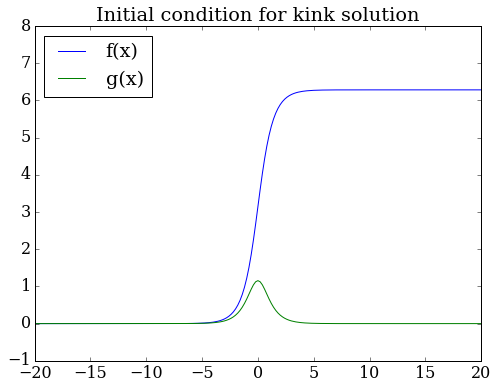

In [11]:
#Setup and plot initial conditions of kink 
fx_kink=4.*arctan(exp(x/sqrt(1.-v**2)))
gx_kink=2.*v/sqrt(1-v**2)/cosh(x/sqrt(1.-v**2))

plt.figure(figsize=(8,6))
plt.plot(x,fx_kink,label='f(x)')
plt.plot(x,gx_kink,label='g(x)')
plt.ylim(-1,8)
plt.title('Initial condition for kink solution')
plt.legend(loc='best');

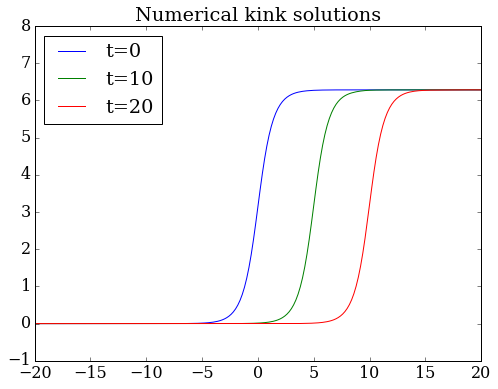

In [12]:
#Compute and plot the kink solution
u_kink=sinegordon1D(nt,dt,dx,fx_kink,gx_kink,alpha)

plt.figure(figsize=(8,6))
plt.plot(x,u_kink[0,:], label='t=0')
plt.plot(x,u_kink[int(10/dt),:], label='t=10')
plt.plot(x,u_kink[int(20/dt),:], label='t=20')
plt.ylim(-1,8)
plt.title('Numerical kink solutions')
plt.legend(loc='best')

Animation of kink solution:

<br\><br\>The initial conditions for the anti-kink are <br\>
$$f(x)=4\arctan \left[\exp \left(-\frac{x}{\sqrt{1-v^2}}\right)\right]$$
$$g(x)=-2 \frac{v}{\sqrt{1-v^2}}  \text{sech} \left({\frac{x}{\sqrt{1-v^2}}}\right)$$

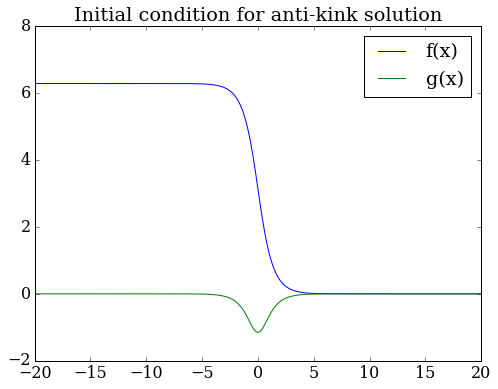

In [13]:
#Setup and plot initial conditions of anti-kink
fx_anti=4.*arctan(exp(-x/sqrt(1.-v**2)))
gx_anti=-2.*v/sqrt(1-v**2)/cosh(x/sqrt(1.-v**2))

plt.figure(figsize=(8,6))
plt.plot(x,fx_anti,label='f(x)')
plt.plot(x,gx_anti,label='g(x)')
plt.ylim(-2,8)
plt.title('Initial condition for anti-kink solution')
plt.legend(loc='best');

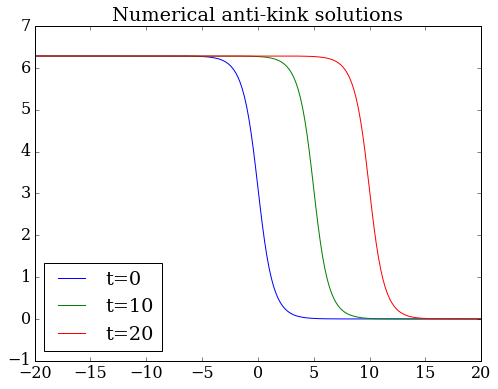

In [14]:
#Compute and plot the anti-kink solution
u_anti=sinegordon1D(nt,dt,dx,fx_anti,gx_anti,alpha)

plt.figure(figsize=(8,6))
plt.plot(x,u_anti[0,:], label='t=0')
plt.plot(x,u_anti[int(10/dt),:], label='t=10')
plt.plot(x,u_anti[int(20/dt),:], label='t=20')
plt.title('Numerical anti-kink solutions')
plt.legend(loc='best')

### 2. Breather soliton

The initial conditions for the breather are <br\><br\>
$$f(x)=0$$<br\>
$$g(x)=4\sqrt{1-\omega^2}\text{ sech} \left(\sqrt{1-\omega^2}x\right)$$

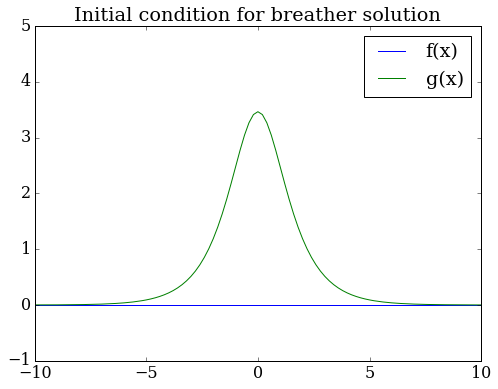

In [15]:
#Setup and plot initial conditions of breather
fx_breather=numpy.zeros(nx)
gx_breather=4.*sqrt(1-omega**2)/cosh(sqrt(1-omega**2)*x)

plt.figure(figsize=(8,6))
plt.plot(x,fx_breather,label='f(x)')
plt.plot(x,gx_breather,label='g(x)')
plt.xlim(-10,10)
plt.ylim(-1,5)
plt.title('Initial condition for breather solution')
plt.legend(loc='best');

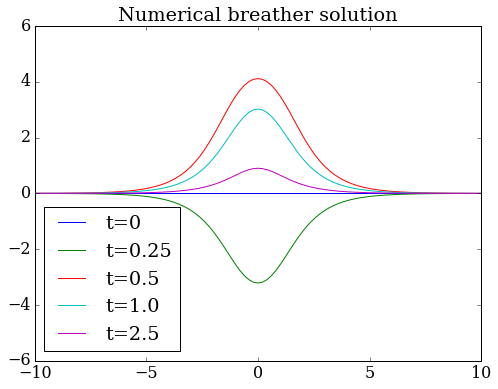

In [16]:
#Compute and plot the breather solution
u_breather=sinegordon1D(nt,dt,dx,fx_breather,gx_breather,alpha)

plt.figure(figsize=(8,6))
plt.plot(x,u_breather_ana[0,:], label='t=0')
plt.plot(x,u_breather_ana[5,:], label='t=0.25')
plt.plot(x,u_breather_ana[10,:], label='t=0.5')
plt.plot(x,u_breather_ana[20,:],label='t=1.0')
plt.plot(x,u_breather_ana[50,:],label='t=2.5')
plt.xlim(-10,10)
plt.ylim(-6,6)
plt.title('Numerical breather solution')
plt.legend(loc='best')

##### Dig Deeper

Recall the process we using the two initial conditions, we use <br\><br\>
$$\frac{\partial{u(x_{i},0)}}{\partial t}=\frac{u_{i}^{1}-u_{i}^{-1}}{2\Delta t}=g(x_{i})$$<br\>
to calculate $u_{i}^{-1}$, and substitute it into <br\><br\>
$$u_{i}^{1}=\alpha^2 u_{i+1}^{0}+(2-2\alpha^2) u_{i}^{0}-u_{i}^{-1}+\alpha^2 u_{i-1}^{0}-\Delta t^2\sin u_{i}^{0}$$<br\>
and then get $u_{i}^{1}$.<br\>
Let's consider the equation<br\><br\>
$$\frac{\partial{u(x_{i},0)}}{\partial t}=\frac{u_{i}^{1}-u_{i}^{0}}{\Delta t}=g(x_{i})$$<br\>
or $$u_{i}^{1}=u_{i}^{0}+g(x_{i})\cdot\Delta t=f(x_{i})+g(x_{i})\cdot\Delta t$$<br\>
Is it right? If we use this relationship between $u_{i}^{1}$ and $u_{i}^{0}$ in the function "sinegordon1D", how will it affect our numerical solutions?<br\>

## Reference

[1] *Sine-Gordon Equation*, Wikipidia, https://en.wikipedia.org/wiki/Sine-Gordon_equation<br\>
[2] Ames, William F., ed. Nonlinear partial differential equations. New York: Academic press, 1967.<br\>
[3] Institut für Theoretische Physik, http://pauli.uni-muenster.de/tp/fileadmin/lehre/NumMethoden/WS0910/ScriptPDE/SineGordon.pdf<br\>
[4] Olver, Peter J.  "Lecture Notes on Numerical Analysis."  http://www.math.umn.edu/~olver/num.html.<br\>
[5] Dehghan, Mehdi, and Ali Shokri. "A numerical method for one‐dimensional nonlinear Sine‐Gordon equation using collocation and radial basis functions." Numerical Methods for Partial Differential Equations 24.2 (2008) http://onlinelibrary.wiley.com/doi/10.1002/num.20289/epdf <br\>
[6] Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info<br\>